In [2]:
import tarfile
import os

# Path to the uploaded tar.gz file
tar_file_path = 'csv_files.tar.gz'
extract_dir = 'csv_files_extracted'

# Extract the tar.gz file
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

with tarfile.open(tar_file_path, "r:gz") as tar:
    tar.extractall(path=extract_dir)

# List all the extracted files
extracted_files = os.listdir(extract_dir)
extracted_files

['AK-2021_merge.csv',
 'AK-2022_merge.csv',
 'AK-2023_merge.csv',
 'AL-2021_merge.csv',
 'AL-2022_merge.csv',
 'AL-2023_merge.csv',
 'AR-2021_merge.csv',
 'AR-2022_merge.csv',
 'AR-2023_merge.csv',
 'AZ-2021_merge.csv',
 'AZ-2022_merge.csv',
 'AZ-2023_merge.csv',
 'CA-2021_merge.csv',
 'CA-2022_merge.csv',
 'CA-2023_merge.csv',
 'CO-2021_merge.csv',
 'CO-2022_merge.csv',
 'CO-2023_merge.csv',
 'CT-2021_merge.csv',
 'CT-2022_merge.csv',
 'CT-2023_merge.csv',
 'DE-2021_merge.csv',
 'DE-2022_merge.csv',
 'DE-2023_merge.csv',
 'FL-2021_merge.csv',
 'FL-2022_merge.csv',
 'FL-2023_merge.csv',
 'GA-2021_merge.csv',
 'GA-2022_merge.csv',
 'GA-2023_merge.csv',
 'HI-2021_merge.csv',
 'HI-2022_merge.csv',
 'HI-2023_merge.csv',
 'IA-2021_merge.csv',
 'IA-2022_merge.csv',
 'IA-2023_merge.csv',
 'ID-2021_merge.csv',
 'ID-2022_merge.csv',
 'ID-2023_merge.csv',
 'IL-2021_merge.csv',
 'IL-2022_merge.csv',
 'IL-2023_merge.csv',
 'IN-2021_merge.csv',
 'IN-2022_merge.csv',
 'IN-2023_merge.csv',
 'KS-2021_

In [1]:
import pandas as pd

# Load the specific CSV file
file_path = 'csv_files_extracted/WI-2023_merge.csv'  # Update the path if needed
wi_2023_data = pd.read_csv(file_path)

# Display the header of the dataset
wi_2023_data.head()

,agency_id,incident_id,data_year,offense_code,location_id,incident_date,incident_hour,victim_type_id,age_num,sex_code,race_id,incident_date_month,incident_date_dayofweek,time_of_day,county_name
0,20902,169053779,2023,26A,15,2023-01-02,0.0,4,73,F,10,1,Monday,night,ADAMS
1,20902,169053786,2023,23H,35,2023-01-07,12.0,4,55,M,10,1,Saturday,day,ADAMS
2,20902,169053792,2023,35B,35,2023-01-08,19.0,8,NS,X,99,1,Sunday,day,ADAMS
3,20902,169053795,2023,370,15,2023-01-10,12.0,8,NS,X,99,1,Tuesday,day,ADAMS
4,20902,169053802,2023,35B,35,2023-01-11,6.0,8,NS,X,99,1,Wednesday,day,ADAMS


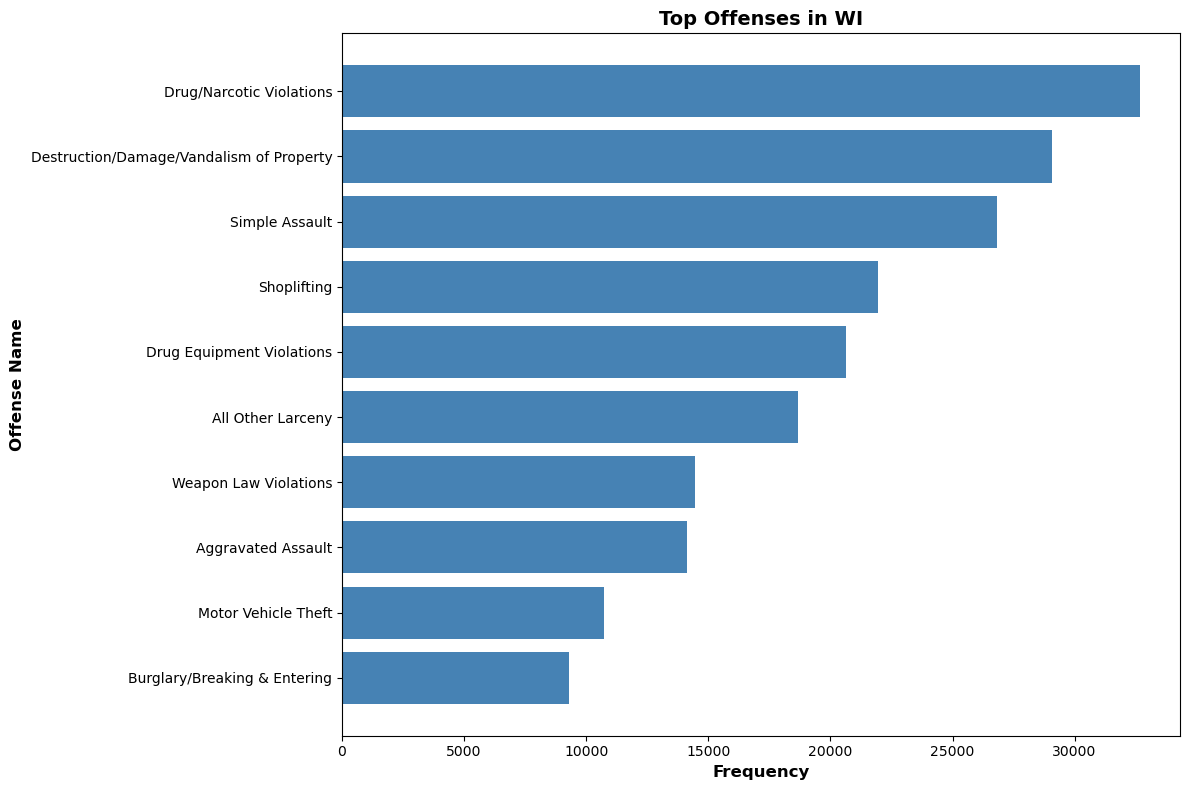

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the main dataset
main_file_path = 'csv_files_extracted/WI-2023_merge.csv'
main_data = pd.read_csv(main_file_path)

# Load the offense type mapping file
offense_mapping_path = 'AK-2021/NIBRS_OFFENSE_TYPE.csv'  # Replace with your actual file path
offense_mapping = pd.read_csv(offense_mapping_path)

# Merge offense names into the main dataset
main_data = main_data.merge(offense_mapping[['offense_code', 'offense_name']],
                            left_on='offense_code',
                            right_on='offense_code',
                            how='left')

# Count occurrences of each offense name
offense_counts = main_data['offense_name'].value_counts().reset_index()
offense_counts.columns = ['Offense Name', 'Frequency']

# Filter to keep the top N offenses
top_n = 10  # Adjust this number as needed
top_offenses = offense_counts.head(top_n)

# Plot the top offenses
plt.figure(figsize=(12, 8))
plt.barh(top_offenses['Offense Name'], top_offenses['Frequency'], color='steelblue')
plt.title('Top Offenses in WI', fontsize=14, fontweight='bold')
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.ylabel('Offense Name', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()

# Save the plot as a high-resolution image
plt.savefig('top_offenses_wi.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

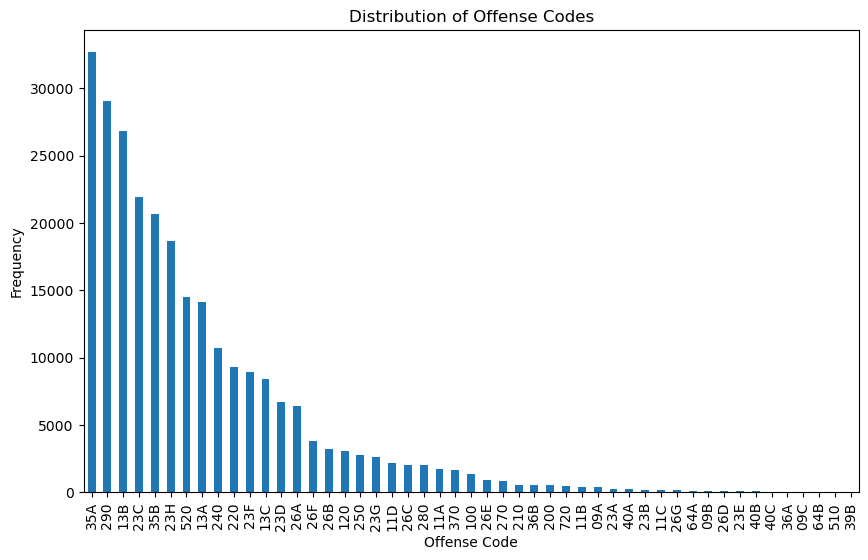

In [3]:
import matplotlib.pyplot as plt

offense_counts = wi_2023_data['offense_code'].value_counts()
plt.figure(figsize=(10, 6))
offense_counts.plot(kind='bar')
plt.title('Distribution of Offense Codes')
plt.xlabel('Offense Code')
plt.ylabel('Frequency')
plt.show()

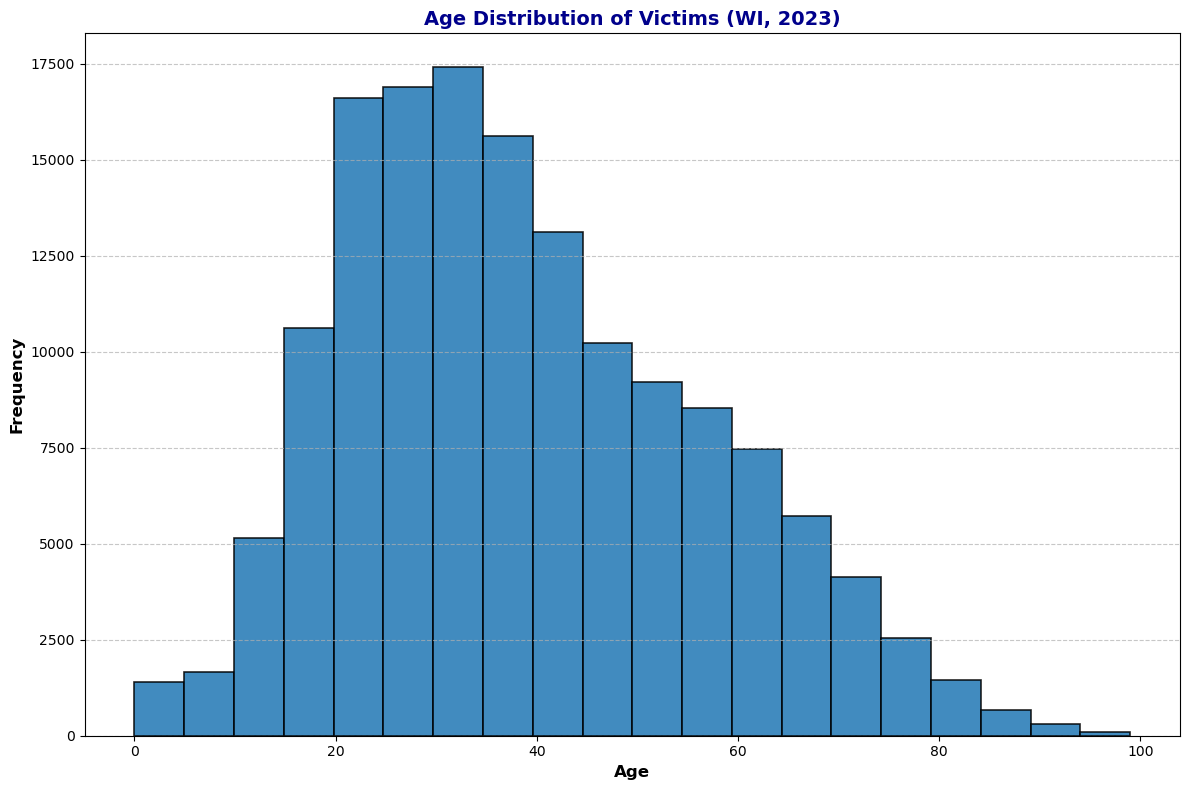

In [4]:
import matplotlib.pyplot as plt

# Ensure 'age_num' is numeric and drop NaN values
wi_2023_data['age_num'] = pd.to_numeric(wi_2023_data['age_num'], errors='coerce')

# Set up the figure
plt.figure(figsize=(12, 8))

# Plot histogram with enhancements
plt.hist(wi_2023_data['age_num'].dropna(), bins=20, alpha=0.85, color='#1f77b4', edgecolor='black', linewidth=1.2)

# Add titles and labels with better formatting
plt.title('Age Distribution of Victims (WI, 2023)', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a high-resolution image
plt.savefig('agedistributionofvictims.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

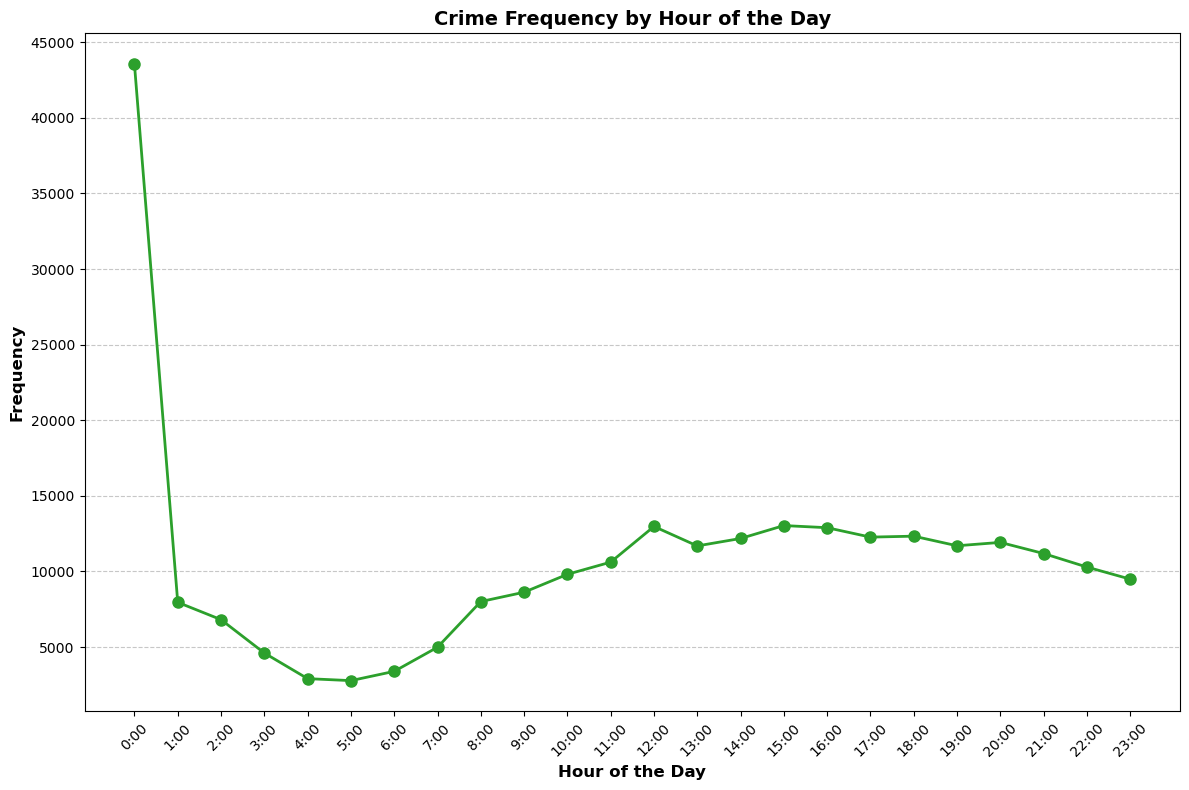

In [5]:
import matplotlib.pyplot as plt

# Count incidents by hour and sort by hour
hour_counts = wi_2023_data['incident_hour'].value_counts().sort_index()

# Set up the figure
plt.figure(figsize=(12, 8))

# Plot the line chart with enhancements
plt.plot(hour_counts.index, hour_counts.values, marker='o', linestyle='-', color='#2ca02c', linewidth=2, markersize=8)

# Add titles and labels with better formatting
plt.title('Crime Frequency by Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize x-axis ticks to show every hour
plt.xticks(ticks=range(0, 24), labels=[f"{h}:00" for h in range(0, 24)], rotation=45, fontsize=10)

# Save the plot as a high-resolution image
plt.savefig('crime_frequency_by_hour.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

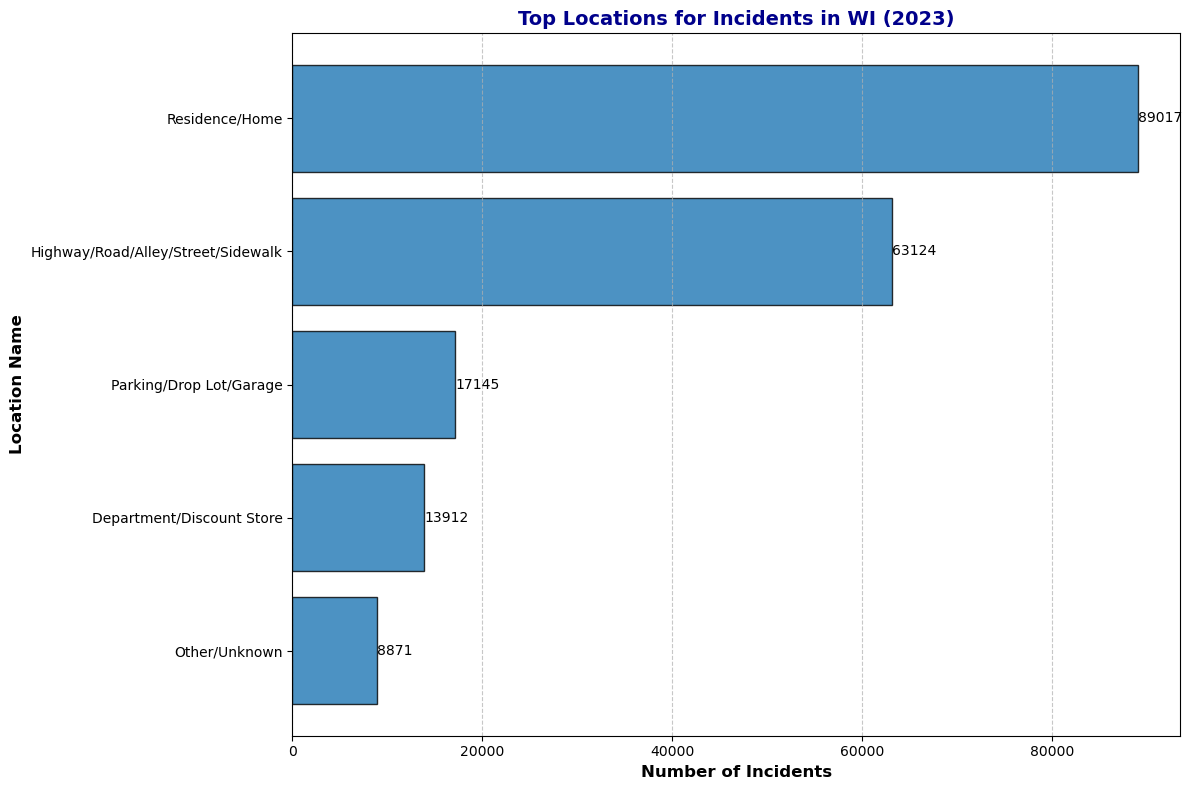

In [7]:
main_file_path = 'csv_files_extracted/WI-2023_merge.csv'
main_data = pd.read_csv(main_file_path)
# Load the location mapping file
location_mapping_path = 'AK-2021/NIBRS_LOCATION_TYPE.csv'  # Update with your actual file
location_mapping = pd.read_csv(location_mapping_path)

# Merge location names into the main dataset
main_data = main_data.merge(location_mapping[['location_id', 'location_name']],
                          left_on='location_id',
                          right_on='location_id',
                          how='left')

# Count the occurrences of each location
location_counts = main_data['location_name'].value_counts().reset_index()
location_counts.columns = ['Location', 'Count']

import matplotlib.pyplot as plt

# Filter to keep only the top N most frequent locations
top_n = 5  # You can adjust this number
top_locations = location_counts.head(top_n)

# Plot the top locations
plt.figure(figsize=(12, 8))
bars = plt.barh(top_locations['Location'], top_locations['Count'], color='#1f77b4', alpha=0.8, edgecolor='black')

# Add count labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center', fontsize=10)

# Enhance visualization
plt.xlabel('Number of Incidents', fontsize=12, fontweight='bold')
plt.ylabel('Location Name', fontsize=12, fontweight='bold')
plt.title('Top Locations for Incidents in WI (2023)', fontsize=14, fontweight='bold', color='darkblue')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('top_locations_WI_2023.png', dpi=300, bbox_inches='tight')  # Save with high resolution
plt.show()

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def load_and_count_incidents(folder_path):
    """
    Function to load all CSV files in a folder, count the number of incidents, and create a summary DataFrame.
    
    Args:
    - folder_path (str): Path to the folder containing state-year CSV files.
    
    Returns:
    - pd.DataFrame: DataFrame containing counts of incidents by state and year.
    """
    incident_summary = []

    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):  # Only process CSV files
            file_path = os.path.join(folder_path, file_name)
            # Extract state and year from the file name
            state, year = file_name.split('-')[0], file_name.split('-')[1][:4]
            # Load the file and count unique incidents
            data = pd.read_csv(file_path)
            incident_count = data['incident_id'].nunique()
            # Append results to the summary list
            incident_summary.append({'State': state, 'Year': int(year), 'Incidents': incident_count})
    
    # Convert to DataFrame
    summary_df = pd.DataFrame(incident_summary)
    return summary_df

# Example Usage
folder_path = 'csv_files_extracted'  # Update with your actual folder path
incident_data = load_and_count_incidents(folder_path)

In [9]:
incident_data.head()

,State,Year,Incidents
0,AK,2021,13100
1,AK,2022,14063
2,AK,2023,16092
3,AL,2021,190233
4,AL,2022,214804


In [17]:
def plot_incident_trend(dataframe, save_path=None):
    """
    Function to plot incident trends by year.
    
    Args:
    - dataframe (pd.DataFrame): DataFrame containing incident counts by state and year.
    - save_path (str): Optional path to save the plot as an image.
    """
    plt.figure(figsize=(12, 8))
    # Pivot the data for plotting
    pivot_df = dataframe.pivot(index='Year', columns='State', values='Incidents')
    pivot_df.plot(marker='o', linestyle='-', ax=plt.gca())
    plt.title('Incident Trends by State and Year', fontsize=16, fontweight='bold')
    # Customize x-axis to show only integer years
    plt.xticks(dataframe['Year'].unique(), rotation=45)  # Set x-ticks to unique years, formatted as integers
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Incidents', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 25})
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

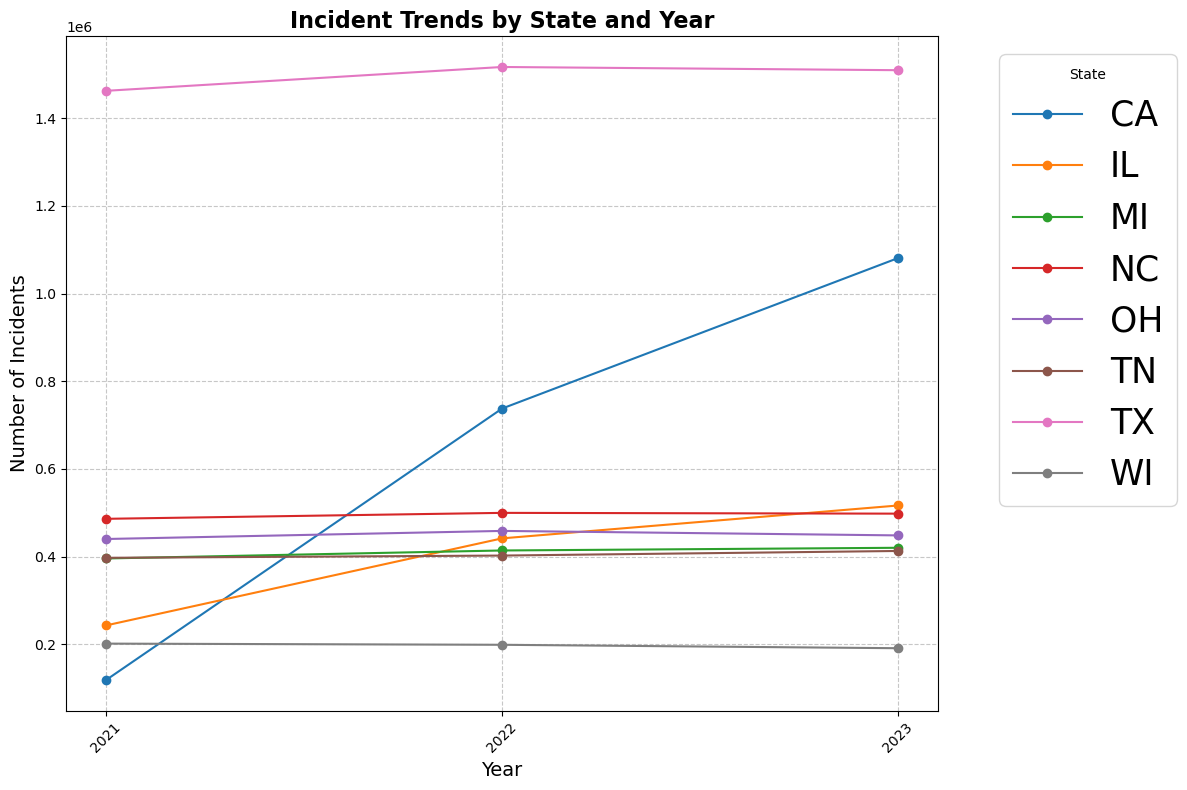

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `state_year_df` is your DataFrame with 'State', 'Year', and 'Incident Count'

# Compute total incidents for each state
total_incidents_by_state = incident_data.groupby('State')['Incidents'].sum().reset_index()

# Sort states by total incidents and select the top 5 states
top_states = total_incidents_by_state.nlargest(7, 'Incidents')['State'].tolist()  # Convert to a Python list

# Ensure Wisconsin (WI) is included
if 'WI' not in top_states:
    top_states.append('WI')

# Filter the DataFrame for the selected states
filtered_df = incident_data[incident_data['State'].isin(top_states)]

# Plot for selected states
plot_incident_trend(filtered_df, save_path="incident_trend_by_state.png")

In [19]:
import plotly.express as px
import pandas as pd

# Filter data for the year 2023
data_2023 = incident_data[incident_data['Year'] == 2023]

# Aggregate incident counts by state
state_incidents_2023 = data_2023.groupby('State')['Incidents'].sum().reset_index()

# Plot the choropleth map
fig = px.choropleth(
    state_incidents_2023,
    locations='State',  # Column with state abbreviations (e.g., WI, TX)
    locationmode='USA-states',  # U.S. state boundaries
    color='Incidents',  # Color based on the incident count
    color_continuous_scale='Reds',  # Choose a color scale
    scope='usa',  # Restrict map to U.S. states
    title='Crime Severity by State in 2023'
)

# Customize the layout
fig.update_layout(
    title_font_size=10,
    geo=dict(
        showcoastlines=True,
        coastlinecolor="Gray"
    ),
    coloraxis_colorbar=dict(
        title="Number of Incidents"
    )
)

# Save the figure as a high-resolution image
fig.write_image("us_crime_map_2023.png", scale=2)

# Show the plot
fig.show()

In [20]:
import plotly.express as px
import pandas as pd

# Filter data for the year 2023
data_2023 = incident_data[incident_data['Year'] == 2023]

# Aggregate incident counts by state
state_incidents_2023 = data_2023.groupby('State')['Incidents'].sum().reset_index()

# Plot the choropleth map
fig = px.choropleth(
    state_incidents_2023,
    locations='State',  # Column with state abbreviations (e.g., WI, TX)
    locationmode='USA-states',  # U.S. state boundaries
    color='Incidents',  # Color based on the incident count
    color_continuous_scale='Reds',  # Choose a color scale
    scope='usa',  # Restrict map to U.S. states
)

# Customize the layout
fig.update_layout(
    title=dict(
        text="Crime Severity by State in 2023",
        font=dict(size=12),  # Smaller title font
        x=0.5,  # Centered horizontally
        xanchor='center',
        y=0.95,  # Slightly above the map
        yanchor='top'
    ),
    geo=dict(
        showcoastlines=True,
        coastlinecolor="Gray"
    ),
    coloraxis_colorbar=dict(
        title="Number of Incidents"
    )
)

# Save the figure as a high-resolution image
fig.write_image("us_crime_map_2023.png", scale=2)

# Show the plot
fig.show()
